# Air Traffic Delays -  July 2015
## Final Project - MIDS Python Bridge
### Geoff Stirling, John Schoen, Laura Williams

## Introductory comments

Data is from the US Dept of Transportation, Bureau of Transportation Statistics

This data includes only flights that both depart and arrive in US states or territories.

Air traffic delays are not just an inconvenience to passengers. Last year, airline flight delays and cancellations cost American passengers more than $2 billion in out-of-pocket costs for hotels, meals, alternate travel arrangements, etc. 
We decided to take a closer look at the nature and potential causes of these delays with an analysis of U.S. Department of Transportation data on flight delays for the month of July, 2015, at the height of the summer travel season.

### Links:

Data download: the CSV file we downloaded for this project for July 2015 with all available columns lives in Google Drive here:<br \>
https://drive.google.com/open?id=0B3QOgdPPe-14NjJUbDZkMFN4OG8

SOURCE: https://www.rita.dot.gov/bts/data_and_statistics/by_mode/airline_and_airports/airline_delay.html

Description of the data and definitions:  http://www.transtats.bts.gov/TableInfo.asp?Table_ID=236&DB_Short_Name=On-Time&Info_Only=0<br />

Column names and descriptions: http://www.transtats.bts.gov/Fields.asp?Table_ID=236&SYS_Table_Name=T_ONTIME&User_Table_Name=On-Time%20Performance&Year_Info=1&First_Year=1987&Last_Year=2016&Rate_Info=0&Frequency=Monthly&Data_Frequency=Annual,Quarterly,Monthly<br />

Where we got the data from the US DOT: http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time




### IMPORT statements

In [1]:
import sys
print(sys.version)
import numpy as np
print("Numpy version:", np.__version__)
import pandas as pd
print("Pandas version:", pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy version: 1.10.1
Pandas version: 0.17.1


##  Install seaborn - run only if you have not already installed seaborn!

In [ ]:
!pip install seaborn

In [ ]:
!pip install --upgrade pip

## Install Seaborn

In [2]:
import seaborn as sns

### Read in the csv file with ALL columns for initial data analysis

In [3]:
flight_data = pd.read_csv('Flight_Data_Original.csv')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Note: we are not using columns 77 or 84, so we didn't do anything about this error message from reading in the data.

###  Columns to be included in the file used for data analysis (28 total):

Year<br \>
Month<br \>
DayofMonth<br \>
DayOfWeek<br \>
UniqueCarrier<br \>
AirlineID<br \>
TailNum<br \>
FlightNum<br \>
OriginAirportID<br \>
OriginCityMarketID<br \>
Origin<br \>
OriginCityName<br \>
OriginState<br \>
DestCityMarketID<br \>
Dest<br \>
DestCityName<br \>
DestState<br \>
DepDelay<br \>
DepDelayMinutes<br \>
DepDel15<br \>
ArrDelay<br \>
ArrDelayMinutes<br \>
ArrDel15<br \>
ArrTimeBlk<br \>
CarrierDelay<br \>
WeatherDelay<br \>
NASDelay<br \>
SecurityDelay<br \>
LateAircraftDelay

### Drop columns not needed for data analysis

In [4]:
fd_filtered = flight_data.drop(['Div5TailNum', 
                                'Div5WheelsOff',
                                'Div5LongestGTime',
                                'Div5TotalGTime',
                                'Div5WheelsOn',
                                'Div5AirportSeqID',
                                'Div5AirportID',
                                'Div5Airport',
                                'Div4TailNum',
                                'Div4WheelsOff',
                                'Div4LongestGTime',
                                'Div4TotalGTime',
                                'Div4WheelsOn',
                                'Div4AirportSeqID',
                                'Div4AirportID',
                                'Div4Airport',
                                'Div3TailNum',
                                'Div3WheelsOff',
                                'Div3LongestGTime',
                                'Div3TotalGTime',
                                'Div3WheelsOn',
                                'Div3AirportSeqID',
                                'Div3AirportID',
                                'Div3Airport',
                                'Div2TailNum',
                                'Div2WheelsOff',
                                'Div2LongestGTime',
                                'Div2TotalGTime',
                                'Div2WheelsOn',
                                'Div2AirportSeqID',
                                'Div2AirportID',
                                'Div2Airport',
                                'Div1TailNum',
                                'Div1WheelsOff',
                                'Div1LongestGTime',
                                'Div1TotalGTime',
                                'Div1WheelsOn',
                                'Div1AirportSeqID',
                                'Div1AirportID',
                                'Div1Airport',
                                'DivDistance',
                                'DivArrDelay',
                                'DivActualElapsedTime',
                                'DivReachedDest',
                                'DivAirportLandings',
                                'LongestAddGTime',
                                'TotalAddGTime',
                                'FirstDepTime',
                                'Diverted',
                                'CancellationCode',
                                'Cancelled',
                                'Unnamed: 109',
                                'Quarter',
                                'OriginAirportSeqID',
                                'OriginStateFips',
                                'OriginWac',
                                'DestAirportSeqID',
                                'DestStateFips',
                                'DestWac',
                                'DepartureDelayGroups',
                                'DepTimeBlk',
                                'TaxiOut',
                                'WheelsOff',
                                'CRSDepTime',
                                'DepTime',
                                'WheelsOn',
                                'TaxiIn',
                                'CRSArrTime',
                                'ArrTime',
                                'ArrivalDelayGroups',
                                'DistanceGroup',
                                'Distance',
                                'Flights',
                                'AirTime',
                                'ActualElapsedTime', 
                                'CRSElapsedTime', 
                                'DestStateName', 
                                'OriginStateName', 
                                'FlightDate',
                                'Carrier'],
                                axis=1)



column_list = list(fd_filtered.columns)
for i in column_list:
    print(i)

Year
Month
DayofMonth
DayOfWeek
UniqueCarrier
AirlineID
TailNum
FlightNum
OriginAirportID
OriginCityMarketID
Origin
OriginCityName
OriginState
DestAirportID
DestCityMarketID
Dest
DestCityName
DestState
DepDelay
DepDelayMinutes
DepDel15
ArrDelay
ArrDelayMinutes
ArrDel15
ArrTimeBlk
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


### Set display options for displaying the number of columns

In [5]:
pd.set_option("display.max_columns", 30)
pd.get_option("display.max_columns")

30

### Setting up some Seaborn defaults

In [6]:
sns.set(style="whitegrid", context="notebook", color_codes=True) 

### Code we used for taking a quick look at the data

In [7]:
fd_filtered.head()
# fd_filtered.tail(10)
# fd_filtered.size
# fd_filtered.count()
# fd_filtered.index
# fd_filtered.describe()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirlineID,TailNum,FlightNum,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,ArrTimeBlk,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2015,7,11,6,AA,19805,N870AA,36,14771,32457,SFO,"San Francisco, CA",CA,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,-2,0,0,-18,0,0,1300-1359,NaN,NaN,NaN,NaN,NaN
1,2015,7,12,7,AA,19805,N856AA,36,14771,32457,SFO,"San Francisco, CA",CA,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,-7,0,0,-22,0,0,1300-1359,NaN,NaN,NaN,NaN,NaN
2,2015,7,13,1,AA,19805,N864AA,36,14771,32457,SFO,"San Francisco, CA",CA,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,-2,0,0,-6,0,0,1300-1359,NaN,NaN,NaN,NaN,NaN
3,2015,7,14,2,AA,19805,N861AA,36,14771,32457,SFO,"San Francisco, CA",CA,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,-8,0,0,-21,0,0,1300-1359,NaN,NaN,NaN,NaN,NaN
4,2015,7,15,3,AA,19805,N866AA,36,14771,32457,SFO,"San Francisco, CA",CA,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,-2,0,0,-11,0,0,1300-1359,NaN,NaN,NaN,NaN,NaN


## Note re: looking at arrival airports

Each flight that was not cancelled or diverted obviously has both a departure airport and an arrival airport.  Most passengers, while they may be agitated by a delay at the departure airport, are more frequently inconvenienced by delays in arrival. For this reason, we focused on arrival delays reported at arrival airports. After looking at different ways of evaluating those arrival delays, we did explore the contribution of departure airports to those arrival delays.

# Worst arrival delays

### Total number of delays by arrival airport

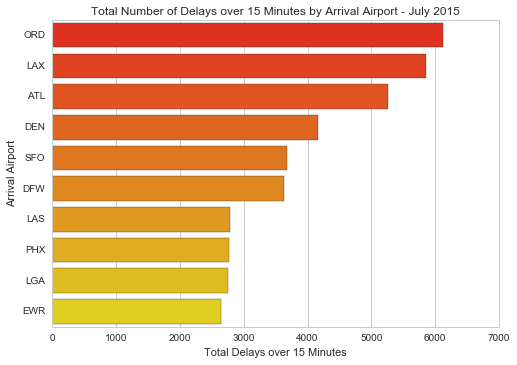

In [8]:
total_delays = fd_filtered.ArrDel15.groupby(fd_filtered.Dest) \
                          .sum() \
                          .sort_values(ascending = False) \
                          .head(10) 

total_delays_graph = sns.barplot(x=total_delays.values, y=total_delays.index, palette='autumn')
total_delays_graph.set(title='Total Number of Delays over 15 Minutes by Arrival Airport - July 2015', 
                       xlabel='Total Delays over 15 Minutes', 
                       ylabel='Arrival Airport')

plt.savefig('TotalDelays.png')

### Percentage of all flights delayed over 15 minutes, by arrival airport

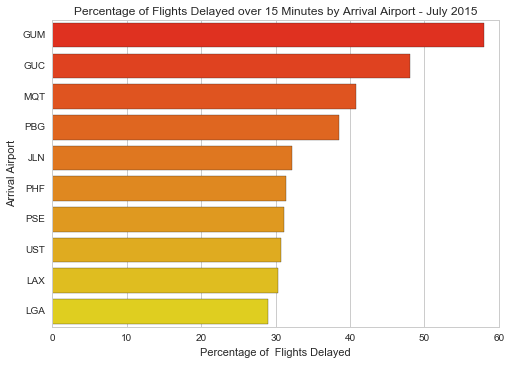

In [10]:
percent_delays = fd_filtered.ArrDel15.groupby(fd_filtered.Dest) \
                            .sum() \
                            .div(fd_filtered.Dest.value_counts()) \
                            .mul(100) \
                            .sort_values(ascending = False) \
                            .head(10)
                   
percent_delays_graph = sns.barplot(x=percent_delays.values, y=percent_delays.index, palette='autumn')
percent_delays_graph.set(title='Percentage of Flights Delayed over 15 Minutes by Arrival Airport - July 2015', 
                        xlabel='Percentage of  Flights Delayed', 
                        ylabel='Arrival Airport')
                        
plt.savefig('PercentageDelaysArrival.png')

### Total number of minutes of delay per arrival airport

In [ ]:
total_minutes = fd_filtered.ArrDelayMinutes.groupby(fd_filtered.Dest) \
                           .sum() \
                           .sort_values(ascending = False) \
                           .head(10) 
    
        
total_minutes_graph = sns.barplot(x=total_minutes.values, y=total_minutes.index, palette='autumn')
total_minutes_graph.set(title='Total Minutes of Delays by Arrival Airport - July 2015', 
                        xlabel='Total Minutes of Delays',
                        ylabel='Arrival Airport')

            
plt.savefig('TotalMinutesArrival.png')

### Average number of minutes of delay, per arrival airport

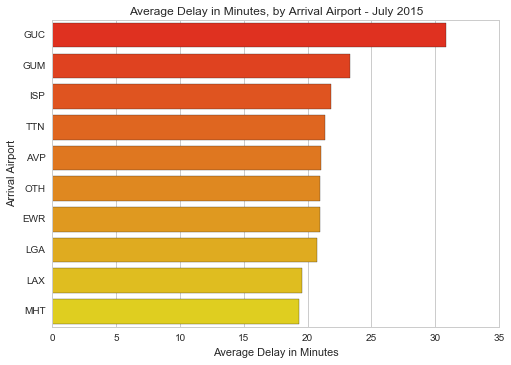

In [11]:
avg_minutes = fd_filtered.ArrDelayMinutes.groupby(fd_filtered.Dest) \
                                         .mean() \
                                         .sort_values(ascending = False) \
                                         .head(10) 
        
avg_minutes_graph = sns.barplot(x=avg_minutes.values, y=avg_minutes.index, palette='autumn')
avg_minutes_graph.set(title='Average Delay in Minutes, by Arrival Airport - July 2015', 
                      xlabel='Average Delay in Minutes',
                      ylabel='Arrival Airport')
                    
plt.savefig('AverageMinutesArrival.png')

### Determining if depature airports disproportionately impact delays at airports with significant arrival delays

For some airports with the largest proportions of delays over 15 minutes:

We determined  if any originating airport disproportionately contributed to the delays of the arrival airport. For instance, maybe Phoenix accounts for 25% of total 15+ min delayed flights to Las Vegas, but represents only 15% of flights to Las Vegas.

The ratio we're looking for, using LAX and number of delays as an example, is this:

Number of delayed flights from an origin airport into LAX (calculated with .sum method) \ all delayed flights at LAX

less

Number of total flights from that origin airport into LAX \ total flights into LAX

GUC = Gunnison, CO

Only two national airports fly into Gunnison, and Denver is disproportionally responsible for delays by 8%.

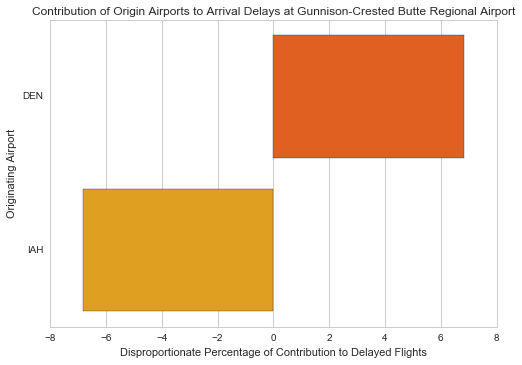

In [15]:
arr_airport = fd_filtered[fd_filtered.Dest == 'GUC']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

origins = arr_airport.groupby('Origin')['ArrDel15'] \
                     .sum() \
                     .div(arr_airport.ArrDel15.sum()) \
                     .subtract(subset_ratio) \
                     .mul(100) \
                     .sort_values(ascending = False) \
                     .head(5) 
                    
        
origins_graph = sns.barplot(x=origins.values, y=origins.index, palette='autumn')
origins_graph.set(title='Contribution of Origin Airports to Arrival Delays at ' \
                        'Gunnison-Crested Butte Regional Airport', 
                  xlabel='Disproportionate Percentage of Contribution to Delayed Flights',
                  ylabel='Originating Airport')                 

                
plt.savefig('GUCOriginDelays.png')

LAX = Los Angeles, CA

There are a few originating airports that disproportionately impact Los Angeles's delays, but not by a huge margin.  SFO in San Francisco contributes most to LAX's delays by a margin of about 2.6%

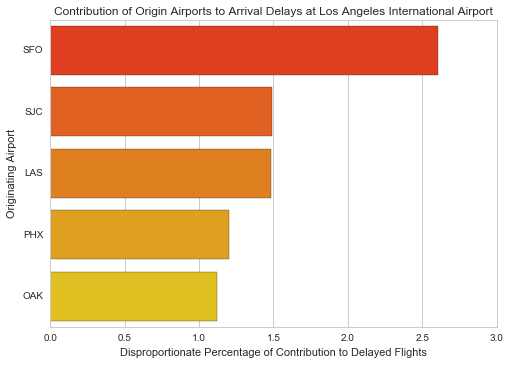

In [16]:
arr_airport = fd_filtered[fd_filtered.Dest == 'LAX']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

origins = arr_airport.groupby('Origin')['ArrDel15'] \
                     .sum() \
                     .div(arr_airport.ArrDel15.sum()) \
                     .subtract(subset_ratio) \
                     .mul(100) \
                     .sort_values(ascending = False) \
                     .head(5)
                
        
origins_graph = sns.barplot(x=origins.values, y=origins.index, palette='autumn')
origins_graph.set(title='Contribution of Origin Airports to Arrival Delays at ' \
                        'Los Angeles International Airport', 
                  xlabel='Disproportionate Percentage of Contribution to Delayed Flights',
                  ylabel='Originating Airport')  

plt.savefig('LAXOriginDelays.png')

GUM = Guam

Honolulu is the only national location that flies into and out of Guam, so there could not be any variance among origin airports for delayed flights arriving at Guam.  

That said, knowing that Honolulu accounts for ALL flights into Guam, we can say with certaintey that there is an almost 60% chance of a delay over 15 minutes when flying from Honolulu to Guam.

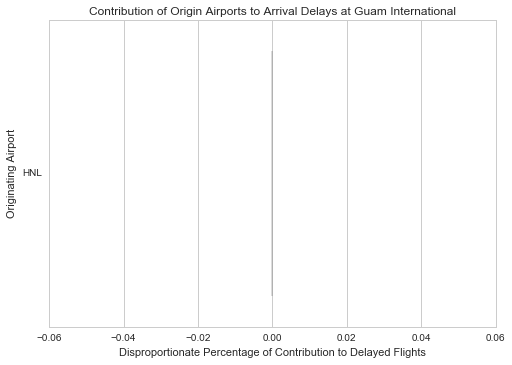

In [20]:
arr_airport = fd_filtered[fd_filtered.Dest == 'GUM']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

origins = arr_airport.groupby('Origin')['ArrDel15'] \
                     .sum() \
                     .div(arr_airport.ArrDel15.sum()) \
                     .subtract(subset_ratio) \
                     .mul(100) \
                     .sort_values(ascending = False) \
                     .head(5) 
                
origins_graph = sns.barplot(x=origins.values, y=origins.index, palette='autumn')
origins_graph.set(title='Contribution of Origin Airports to Arrival Delays at ' \
                        'Guam International', 
                  xlabel='Disproportionate Percentage of Contribution to Delayed Flights',
                  ylabel='Originating Airport')  
                
plt.savefig('GUMOriginDelays.png')

In [18]:
# Confirming that the only flights going into Guam are from Honolulu
# Confirmed via Google search as well
arr_airport = fd_filtered[fd_filtered.Dest == 'GUM']
arr_airport.Origin.value_counts()

HNL    31
Name: Origin, dtype: int64

LGA = Laguardia

Miami International Airport disproportionately contributed to delays at LGA by a little over 1%. This dataset does not show where passengers might be connecting to and from, but a good guess would be that international travelers coming in through Miami might contribute to these delays.

That said, in this case Laguardia as an arrival airport is a problem airport regardless of the originating airport.

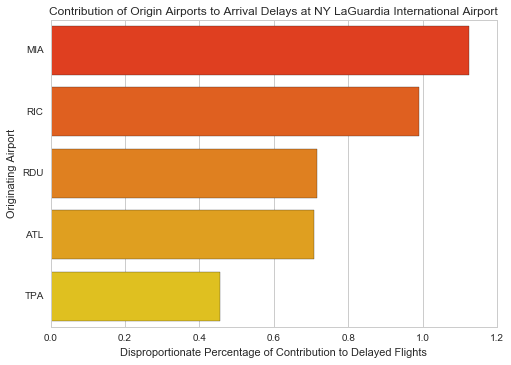

In [21]:
arr_airport = fd_filtered[fd_filtered.Dest == 'LGA']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

origins = arr_airport.groupby('Origin')['ArrDel15'] \
                     .sum() \
                     .div(arr_airport.ArrDel15.sum()) \
                     .subtract(subset_ratio) \
                     .mul(100) \
                     .sort_values(ascending = False) \
                     .head(5) 
                
                
origins_graph = sns.barplot(x=origins.values, y=origins.index, palette='autumn')
origins_graph.set(title='Contribution of Origin Airports to Arrival Delays at ' \
                        'NY LaGuardia International Airport', 
                  xlabel='Disproportionate Percentage of Contribution to Delayed Flights',
                  ylabel='Originating Airport')  
                
    
plt.savefig('LGAOriginDelays.png')

New York City's JFK airport contributed disproportionately by 11% to the flights into Puerto Rico.

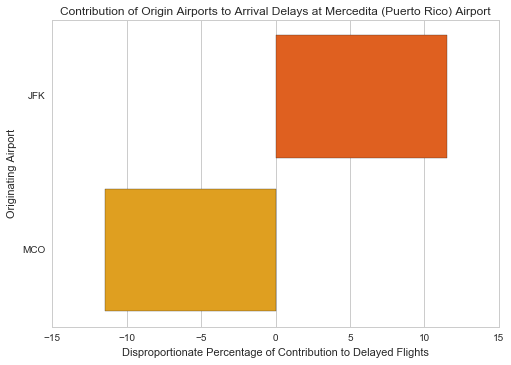

In [22]:
arr_airport = fd_filtered[fd_filtered.Dest == 'PSE']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

origins = arr_airport.groupby('Origin')['ArrDel15'] \
                     .sum() \
                     .div(arr_airport.ArrDel15.sum()) \
                     .subtract(subset_ratio) \
                     .mul(100) \
                     .sort_values(ascending = False) \
                     .head(5) 
                
                
origins_graph = sns.barplot(x=origins.values, y=origins.index, palette='autumn')
origins_graph.set(title='Contribution of Origin Airports to Arrival Delays at ' \
                        'Mercedita (Puerto Rico) Airport', 
                  xlabel='Disproportionate Percentage of Contribution to Delayed Flights',
                  ylabel='Originating Airport')  
                
plt.savefig('PSEOriginDelays.png')

Otherwise, most airports with a large proportional number of flights delayed over 15 mintues did not show any particularly interesting data with this analysis.

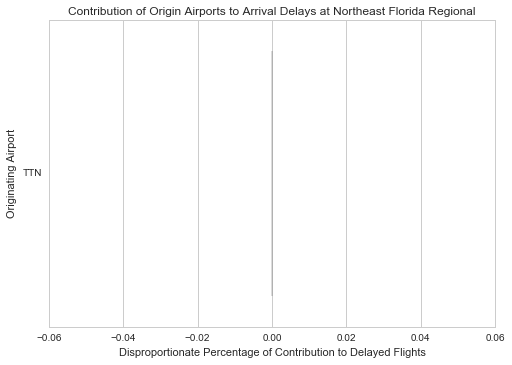

In [23]:
arr_airport = fd_filtered[fd_filtered.Dest == "UST"]

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

origins = arr_airport.groupby('Origin')['ArrDel15'] \
                     .sum() \
                     .div(arr_airport.ArrDel15.sum()) \
                     .subtract(subset_ratio) \
                     .mul(100) \
                     .sort_values(ascending = False) \
                     .head(5) \
                
origins_graph = sns.barplot(x=origins.values, y=origins.index, palette='autumn')
origins_graph.set(title='Contribution of Origin Airports to Arrival Delays at ' \
                        'Northeast Florida Regional', 
                  xlabel='Disproportionate Percentage of Contribution to Delayed Flights',
                  ylabel='Originating Airport')  
                        

-------------
### End of the analysis of origin airports contributing to delays at arrival airports

# Worst delayed flights

In [24]:
fd_filtered.dropna().sort_values(by='ArrDelay').tail(5)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirlineID,TailNum,FlightNum,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,ArrTimeBlk,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
47849,2015,7,9,4,AA,19805,N798AA,16,14771,32457,SFO,"San Francisco, CA",CA,12478,31703,JFK,"New York, NY",NY,1176,1176,1,1167,1167,1,2100-2159,1167,0,0,0,0
38485,2015,7,28,2,AA,19805,N7BXAA,2334,13930,30977,ORD,"Chicago, IL",IL,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,1223,1223,1,1203,1203,1,1400-1459,804,0,0,0,399
15000,2015,7,8,3,AA,19805,N5DKAA,162,12173,32134,HNL,"Honolulu, HI",HI,12892,32575,LAX,"Los Angeles, CA",CA,1170,1170,1,1212,1212,1,2100-2159,1170,0,42,0,0
3115,2015,7,18,6,AA,19805,N3DUAA,210,12889,32211,LAS,"Las Vegas, NV",NV,12478,31703,JFK,"New York, NY",NY,1393,1393,1,1364,1364,1,1600-1659,1364,0,0,0,0
22263,2015,7,13,1,AA,19805,N3LEAA,1319,12339,32337,IND,"Indianapolis, IN",IN,12892,32575,LAX,"Los Angeles, CA",CA,1625,1625,1,1636,1636,1,2000-2059,1625,0,11,0,0


(Note: for this analysis we encountered a number of Nan records, which could also indicate problems with the reliability of this data set.)

In [25]:
fd_filtered.ArrDelay.isnull().value_counts()

False    514384
True       6334
Name: ArrDelay, dtype: int64

### Single longest delay of all flights

In [26]:
fd_filtered[fd_filtered.ArrDelay == fd_filtered.ArrDelay.max()]

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirlineID,TailNum,FlightNum,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,ArrTimeBlk,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
22263,2015,7,13,1,AA,19805,N3LEAA,1319,12339,32337,IND,"Indianapolis, IN",IN,12892,32575,LAX,"Los Angeles, CA",CA,1625,1625,1,1636,1636,1,2000-2059,1625,0,11,0,0


# Beating the clock

### Departure that left the earliest before its scheduled departure time

In [27]:
fd_filtered[fd_filtered.ArrDelay == fd_filtered.ArrDelay.min()]

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirlineID,TailNum,FlightNum,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,ArrTimeBlk,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
76729,2015,7,4,6,AS,19930,N513AS,3,11278,30852,DCA,"Washington, DC",VA,14747,30559,SEA,"Seattle, WA",WA,-13,0,0,-73,0,0,2100-2159,NaN,NaN,NaN,NaN,NaN


Five flights that left the earliest:

In [28]:
fd_filtered.sort_values(by='ArrDelay').head(5)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirlineID,TailNum,FlightNum,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,ArrTimeBlk,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
76729,2015,7,4,6,AS,19930,N513AS,3,11278,30852,DCA,"Washington, DC",VA,14747,30559,SEA,"Seattle, WA",WA,-13,0,0,-73,0,0,2100-2159,NaN,NaN,NaN,NaN,NaN
80490,2015,7,10,5,AS,19930,N596AS,729,12264,30852,IAD,"Washington, DC",VA,14747,30559,SEA,"Seattle, WA",WA,-10,0,0,-68,0,0,2100-2159,NaN,NaN,NaN,NaN,NaN
47515,2015,7,19,7,AA,19805,N794AA,2,12892,32575,LAX,"Los Angeles, CA",CA,12478,31703,JFK,"New York, NY",NY,-4,0,0,-68,0,0,1700-1759,NaN,NaN,NaN,NaN,NaN
245,2015,7,11,6,AA,19805,N3JMAA,45,12478,31703,JFK,"New York, NY",NY,14747,30559,SEA,"Seattle, WA",WA,-3,0,0,-65,0,0,2200-2259,NaN,NaN,NaN,NaN,NaN
86507,2015,7,28,2,AS,19930,N468AS,11,11618,31703,EWR,"Newark, NJ",NJ,14747,30559,SEA,"Seattle, WA",WA,-10,0,0,-64,0,0,2000-2059,NaN,NaN,NaN,NaN,NaN


### Number of flights with over 10 hour (600 minutes) delays

In [29]:
fd_filtered[fd_filtered.ArrDelay  > 600].sort_values(by='ArrDelay')

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,AirlineID,TailNum,FlightNum,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,ArrTimeBlk,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
81274,2015,7,16,4,AS,19930,N528AS,159,12892,32575,LAX,"Los Angeles, CA",CA,10299,30299,ANC,"Anchorage, AK",AK,576,576,1,601,601,1,1300-1359,0,0,25,0,576
505332,2015,7,6,1,EV,20366,N33182,5969,15412,35412,TYS,"Knoxville, TN",TN,13930,30977,ORD,"Chicago, IL",IL,622,622,1,601,601,1,1000-1059,0,601,0,0,0
444830,2015,7,27,1,DL,19790,N903DE,1478,14100,34100,PHL,"Philadelphia, PA",PA,10397,30397,ATL,"Atlanta, GA",GA,640,640,1,604,604,1,1200-1259,604,0,0,0,0
90466,2015,7,7,2,AS,19930,N713AS,48,10170,30070,ADQ,"Kodiak, AK",AK,10299,30299,ANC,"Anchorage, AK",AK,610,610,1,605,605,1,0900-0959,605,0,0,0,0
455220,2015,7,29,3,DL,19790,N331NW,2085,11884,31884,GEG,"Spokane, WA",WA,14869,34614,SLC,"Salt Lake City, UT",UT,622,622,1,611,611,1,0800-0859,611,0,0,0,0
385181,2015,7,9,4,UA,19977,N48127,1935,12892,32575,LAX,"Los Angeles, CA",CA,11618,31703,EWR,"Newark, NJ",NJ,648,648,1,614,614,1,1700-1759,6,0,0,0,608
483505,2015,7,16,4,DL,19790,N808DN,1598,14747,30559,SEA,"Seattle, WA",WA,10397,30397,ATL,"Atlanta, GA",GA,634,634,1,615,615,1,1500-1559,615,0,0,0,0
458244,2015,7,31,5,DL,19790,N940DL,1076,10397,30397,ATL,"Atlanta, GA",GA,11057,31057,CLT,"Charlotte, NC",NC,645,645,1,620,620,1,2200-2259,620,0,0,0,0
316654,2015,7,12,7,F9,20436,N906FR,748,14107,30466,PHX,"Phoenix, AZ",AZ,11292,30325,DEN,"Denver, CO",CO,624,624,1,623,623,1,0700-0759,623,0,0,0,0
260512,2015,7,15,3,HA,19690,N382HA,16,12173,32134,HNL,"Honolulu, HI",HI,14679,33570,SAN,"San Diego, CA",CA,625,625,1,628,628,1,2200-2259,628,0,0,0,0


# Evaluating flights by major metropolitan areas

#### SF Bay Area Flights: Average Delay by Airport

#### Takeaway: If you're flying to the SF Bay Area in July and avoiding long delays is your goal, you're pretty much safe going to any of the three major area airports. SFO wins by a hair, but they're all very close.

In [30]:
sf = fd_filtered.groupby(['Dest']).ArrDelay.mean()

print("San Francisco:",sf["SFO"],"minutes")
print("Oakland:",sf["OAK"],"minutes")
print("San Jose:",sf["SJC"],"minutes")

San Francisco: 9.05751247979 minutes
Oakland: 10.2854713314 minutes
San Jose: 9.35413333333 minutes


#### NYC Area Flights: Average Delay by Airport

#### Takeaway: If you're flying to the NYC Area in July and avoiding long delays is your goal, you're best bet by a longshot is to fly into JFK.

In [31]:
nyc = fd_filtered.groupby(['Dest']).ArrDelay.mean()

print("Newark:",sf["EWR"],"minutes")
print("JFK:",sf["JFK"],"minutes")
print("LaGuardia:",sf["LGA"],"minutes")

Newark: 13.178526971 minutes
JFK: 2.9417443774 minutes
LaGuardia: 13.9470899471 minutes


We worked on trying to figure out another way using the City Market to get the information, but decided the above code was the most efficient to get what we were looking at.

In [32]:
fd_filtered.groupby(['DestCityMarketID', 'Dest']).ArrDelay.mean()

DestCityMarketID  Dest
30070             ADQ     -2.981818
30073             SCC      2.618421
30107             BRW      4.753623
30113             BET      4.341176
30135             ABE      3.640351
30136             ABI     -1.277512
30140             ABQ      7.314623
30141             ABR      2.459016
30146             ABY     12.532468
30154             ACK     -0.302158
30155             ACT     11.783784
30157             ACV     10.758333
30158             ACY     14.336283
30165             ADK     -6.333333
30185             AEX      7.692833
30189             COS     11.541401
30194             DAL      6.393425
                  DFW      3.241671
30198             PIT      7.180419
30208             AGS      3.574661
30245             AKN     -0.806452
30255             HSV      2.907363
30257             ALB     12.301700
30268             ALO      4.827586
30279             AMA      6.673333
30285             DRO     -1.058537
30299             ANC      7.544971
30325

#### SF Bay Area Flights: Percentage of flights by airport with a 15+ minutes delay

#### Takeaway: If you're flying to the SF Bay Area in July and seeking the airport that's least likely to have a delay, all three airports have a very similar delay (15+ minutes) profile. Oakland wins by just tenths of a percent, but you're practically as likely to be delayed flying into any of the three SF Bay Area airports.

In [33]:
sf_ratio = fd_filtered.ArrDel15.groupby(fd_filtered.Dest) \
                               .sum() \
                               .div(fd_filtered.Dest.value_counts()) \
        
print("San Francisco:",str(sf_ratio["SFO"] * 100) + "%")
print("Oakland:",str(sf_ratio["OAK"] * 100) + "%")
print("San Jose:",str(sf_ratio["SJC"] * 100) + "%")

San Francisco: 25.52130239%
Oakland: 23.4494274809%
San Jose: 23.6938349007%


#### Takeaway: If you're flying to the NYC Area in July and seeking the airport that's least likely to have a delay (15+ minues), JFK is your best bet. While the ratio of delayed flights is in a tight range for these three aiports, you would want to

In [34]:
nyc_ratio = fd_filtered.ArrDel15.groupby(fd_filtered.Dest) \
                                .sum() \
                                .div(fd_filtered.Dest.value_counts()) \
         
print("Newark:",nyc_ratio["EWR"])
print("JFK:",nyc_ratio["JFK"])
print("LaGuardia:",nyc_ratio["LGA"])

Newark: 0.267460637868
JFK: 0.205044928007
LaGuardia: 0.290026385224


# Exploration re: specific routes between major cities

#### Exploration Question: 
If you have to plan a flight from Chicago to Seattle, what carrier should you take to have the best chance of avoiding a delayed arrival (15+ minutes)?

NOTE: We began to explore other data and abaondoned this direction. We know that this code doesn't work and is simply an example of other directions we began to explore.

In [37]:
#fd_filtered["Origin"].groupby(fd_filtered.Origin)
df = fd_filtered.filter(like="ORD").value_counts()



AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [38]:
ds = fd_filtered["Origin"].groupby(fd_filtered["Origin"])

ds.count()


Origin
ABE      232
ABI      211
ABQ     2045
ABR       62
ABY       77
ACK      139
ACT      149
ACV      122
ACY      341
ADK        9
ADQ       58
AEX      299
AGS      221
AKN       31
ALB      716
ALO       58
AMA      454
ANC     2086
APN       54
ASE      261
ATL    33735
ATW      315
AUS     4301
AVL      342
AVP      145
AZO      130
BDL     1842
BET       85
BFL      257
BGM       61
       ...  
SPI      154
SPS      122
SRQ      241
STL     4613
STT      396
STX      101
SUN      131
SUX       58
SWF       62
SYR      538
TLH      284
TOL       91
TPA     5853
TRI      195
TTN      279
TUL     1285
TUS     1251
TVC      380
TWF       89
TXK       92
TYR      233
TYS      706
UST       13
VLD       87
VPS      540
WRG       62
WYS       53
XNA      933
YAK       62
YUM      177
dtype: int64

## Best Day To Fly

Wednesday was the worst day for delays, with an average of nearly 10 minutes per flight, while Sunday was the best day, with less than three minutes delay per flight.

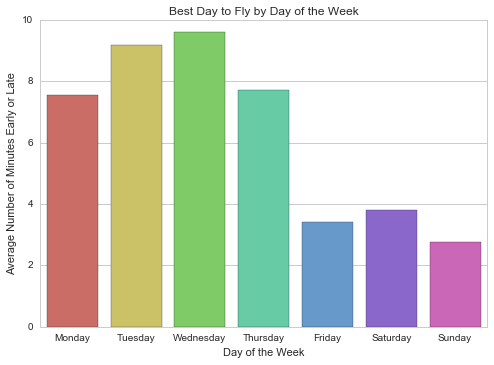

In [47]:
best_day = fd_filtered["ArrDelay"].groupby(fd_filtered["DayOfWeek"]) \
                                  .mean() \
                                  .sort_index(ascending = False)

                                
                
best_day_graph = sns.barplot(x=best_day.index, y=best_day.values, palette='hls')
best_day_graph.set(title='Best Day to Fly by Day of the Week', 
                   xlabel='Day of the Week',
                   ylabel='Average Number of Minutes Early or Late')


xticks = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
best_day_graph.set_xticklabels(xticks)

plt.savefig('BestDayofWeekToFly.png')

# Arrive early: Fly on the Fourth of July

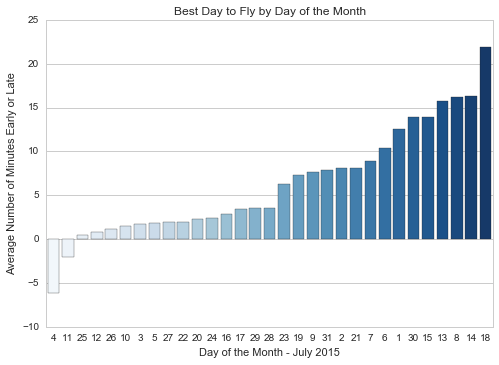

In [50]:
early = fd_filtered["ArrDelay"].groupby(fd_filtered["DayofMonth"]) \
                               .mean() \
                               .sort_values() 

                        
early_graph = sns.barplot(x=early.index, y=early.values, order = early.index, palette='Blues')
early_graph.set(title='Best Day to Fly by Day of the Month', 
                xlabel='Day of the Month - July 2015',
                ylabel='Average Number of Minutes Early or Late')  


plt.savefig('FlyOnFourth.png')

Sum vs. mean for the evaluating the day of the month didn't return substantially different results.

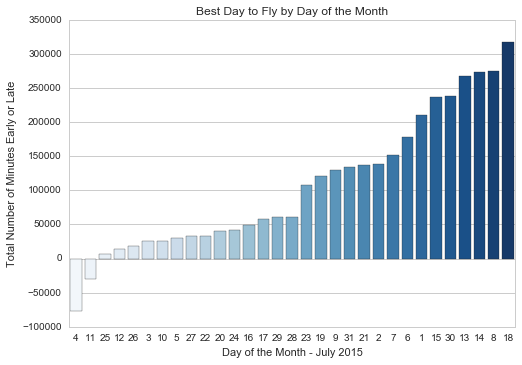

In [51]:
early = fd_filtered["ArrDelay"].groupby(fd_filtered["DayofMonth"]) \
                                   .sum() \
                                   .sort_values()
                
                        
early_graph = sns.barplot(x=early.index, y=early.values, order = early.index, palette='Blues')
early_graph.set(title='Best Day to Fly by Day of the Month', 
                xlabel='Day of the Month - July 2015',
                ylabel='Total Number of Minutes Early or Late')  



July 4, 2015 also produced the best single "under-time" record in our dataset.

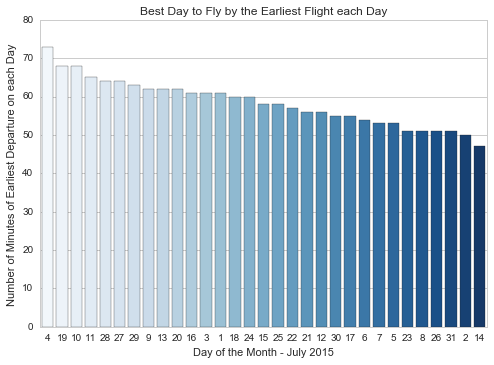

In [52]:
early = fd_filtered["ArrDelay"].groupby(fd_filtered["DayofMonth"]) \
                                   .min() \
                                   .abs() \
                                   .sort_values(ascending = False)
                
                
                        
early_graph = sns.barplot(x=early.index, y=early.values, order = early.index, palette='Blues')
early_graph.set(title='Best Day to Fly by the Earliest Flight each Day', 
                xlabel='Day of the Month - July 2015',
                ylabel='Number of Minutes of Earliest Departure on each Day ')  

plt.savefig('BestDayByMinutes.png')

# Watch out for thunderstorms

The worst total delays occured on the 18th of July, a Saturday, which is typically one of the least-delayed days of the week. So what happened on the 18th? 

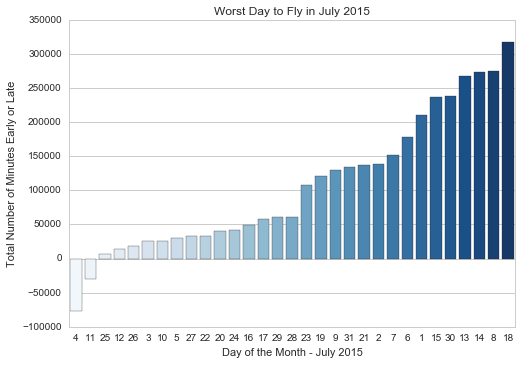

In [53]:
                
early = fd_filtered["ArrDelay"].groupby(fd_filtered["DayofMonth"]) \
                                   .sum() \
                                   .sort_values()
                
                        
early_graph = sns.barplot(x=early.index, y=early.values, order=early.index, palette='Blues')
early_graph.set(title='Worst Day to Fly in July 2015', 
                xlabel='Day of the Month - July 2015',
                ylabel='Total Number of Minutes Early or Late')  

plt.savefig('Thunderstorms.png')

Turns out that was a bad day for thunderstorms, based on the NOAA map for that day.

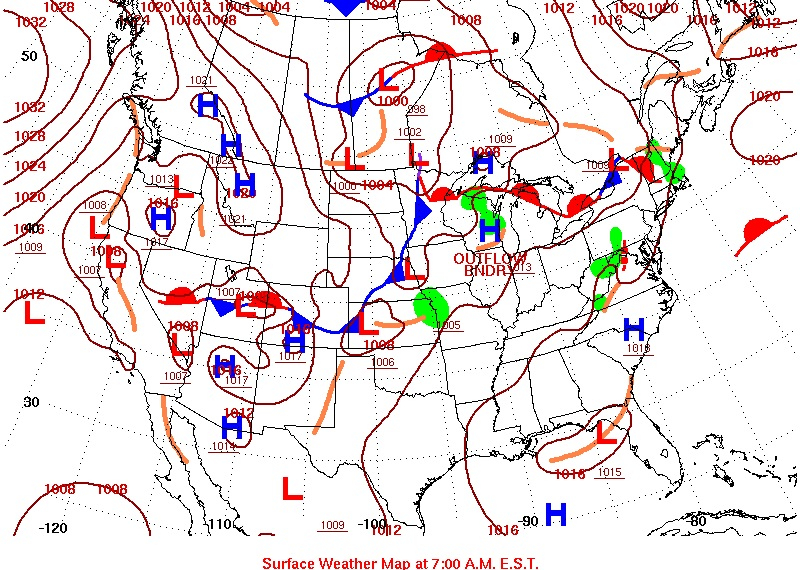

In [54]:
from IPython.display import Image
Image(filename='Hi-LoMap_20150718.jpg')

# Beater airplanes

This one calls out the worst airplanes in the sky. (Not that you can look up tail numbers on Expedia.)

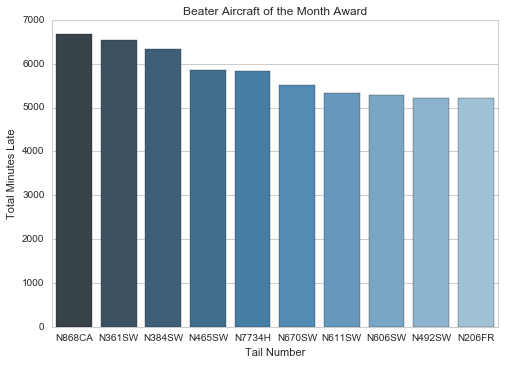

In [55]:
worst_plane = fd_filtered["ArrDelay"].groupby(fd_filtered["TailNum"]) \
                                     .sum() \
                                     .sort_values(ascending = False) \
                                     .head(10)
                    
worst_plane_graph = sns.barplot(x=worst_plane.index, y=worst_plane.values, 
                                order=worst_plane.index, palette='Blues_d')
worst_plane_graph.set(title='Beater Aircraft of the Month Award', 
                      xlabel='Tail Number',
                      ylabel='Total Minutes Late')  


plt.savefig('WorstPlanes.png')

# Worst airlines

### Average delay per airline carrier

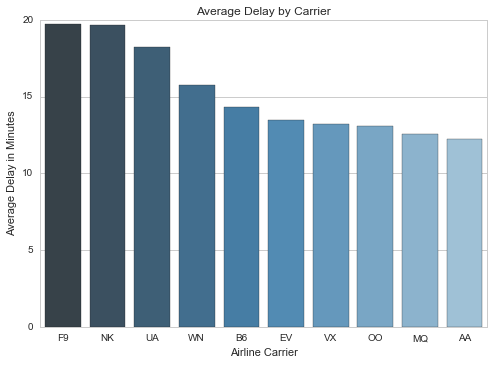

In [56]:
worst_carrier = fd_filtered.ArrDelayMinutes.groupby(fd_filtered.UniqueCarrier) \
                           .mean() \
                           .sort_values(ascending = False) \
                           .head(10) 
                    
worst_carrier_graph = sns.barplot(x=worst_carrier.index, y=worst_carrier.values, 
                                  order=worst_carrier.index, palette='Blues_d')
worst_carrier_graph.set(title='Average Delay by Carrier', 
                        xlabel='Airline Carrier',
                        ylabel='Average Delay in Minutes')  
                    
plt.savefig('AverageMinutesCarrier.png')

This on calls out airlines for total minutes of delay.

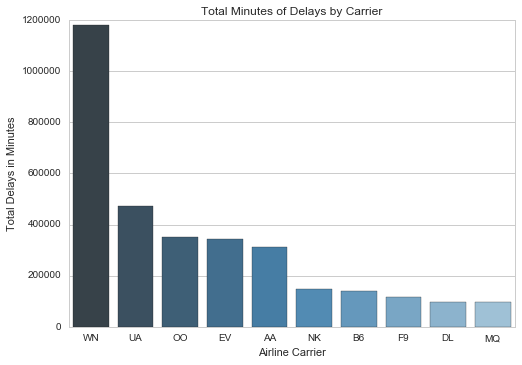

In [60]:
worst_carrier = fd_filtered["ArrDelay"].groupby(fd_filtered["UniqueCarrier"]) \
                                       .sum() \
                                       .sort_values(ascending = False) \
                                       .head(10)

                                        
worst_carrier_graph = sns.barplot(x=worst_carrier.index, y=worst_carrier.values,
                                  order=worst_carrier.index, palette='Blues_d')
worst_carrier_graph.set(title='Total Minutes of Delays by Carrier', 
                        xlabel='Airline Carrier',
                        ylabel='Total Delays in Minutes')  

plt.savefig('AirlinesTotalDelayMinutes.png')

# To get there early, get up early 

No matter what day of the week you want to fly, you'll get their sooner, on average, if you book the earliest flight possible.

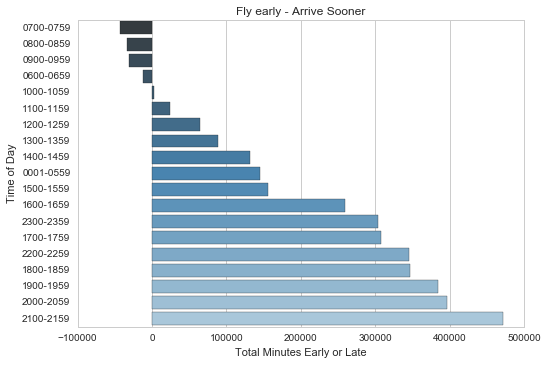

In [61]:
time_of_day = fd_filtered["ArrDelay"].groupby(fd_filtered["ArrTimeBlk"]) \
                                    .sum() \
                                    .sort_values()
                                        
time_of_day_graph = sns.barplot(x=time_of_day.values, y=time_of_day.index,
                                palette='Blues_d')
time_of_day_graph.set(title='Fly early - Arrive Sooner', 
                        xlabel='Total Minutes Early or Late',
                        ylabel='Time of Day')  
                

plt.savefig('TimeOfDay.png')

We considered evaluating cause of delays, but the percentage of NaN values for all causes of delay (46.11% for all delay causes) was too high for this data to be very meaningful.

In [62]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].CarrierDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].CarrierDelay.isnull().value_counts()[0]
        
print("Percentage of null values for Carrier Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for Carrier Delay is 46.1102459981%


In [63]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].WeatherDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].WeatherDelay.isnull().value_counts()[0]
        
print("Percentage of null values for Weather Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for Weather Delay is 46.1102459981%


In [64]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].NASDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].NASDelay.isnull().value_counts()[0]
        
print("Percentage of null values for NAS Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for NAS Delay is 46.1102459981%


In [65]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].SecurityDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].SecurityDelay.isnull().value_counts()[0]
        
print("Percentage of null values for Security Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for Security Delay is 46.1102459981%


In [66]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].LateAircraftDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].LateAircraftDelay.isnull().value_counts()[0]
        
print("Percentage of null values for Late Aircraft Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for Late Aircraft Delay is 46.1102459981%
